In [1]:
import graphviz as gv

In [76]:
#write_depcode_input current flow
wdi_init = gv.Digraph('cluster_wdi_init')
wdi_init.attr(compound='true',label='if-statement')
wdi_init.edge('insert_path_to_geometry','change_sim_par', label='data')
wdi_init.edge('change_sim_par', 'create_iter_matfile',label='data')

wdi = gv.Digraph('cluster_wdi')
wdi.attr(compound='true',label='write_depcode_input')
wdi.subgraph(graph=wdi_init)
wdi.edge('read_depcode_template', 'insert_path_to_geometry',lhead='cluster_wdi_init', label='data')
wdi.edge('create_iter_matfile','replace_burnup_parameters',ltail='cluster_wdi_init',label='data')
wdi.edge('read_depcode_template','replace_burnup_parameters',label='data')

g = gv.Digraph(filename='write_depcode_input.gv',format='png')
g.attr(compound='true')
g.subgraph(graph=wdi)
g.edge('temp_file','read_depcode_template', lhead='cluster_wdi')
g.edge('inp_file','read_depcode_template', lhead='cluster_wdi')
g.edge('reactor','replace_burnup_parameters')
g.edge('dts','insert_path_to_geometry', lhead='cluster_wdi_init')
g.edge('dts','replace_burnup_parameters')
g.edge('restart','insert_path_to_geometry', lhead='cluster_wdi_init')

g.render()

'write_depcode_input.gv.png'

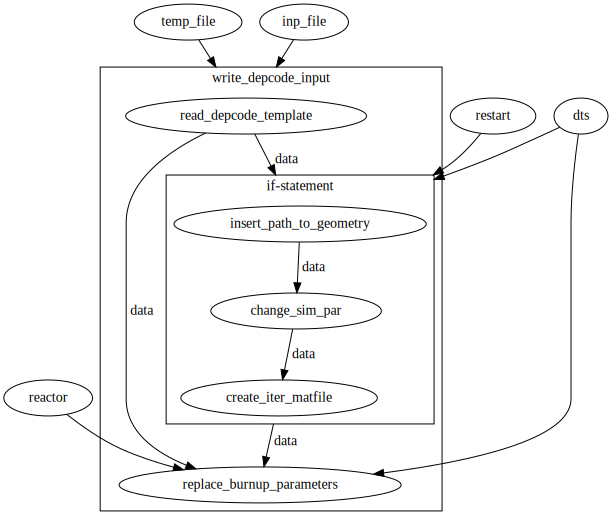

In [77]:
g

In [80]:
#write_depcode_input current flow
owdi_init = gv.Digraph('cluster_owdi_init')
owdi_init.attr(compound='true',label='if-statement')
owdi_init.edge('create_openmc_geometry','change_sim_par_openmc',color='white')
owdi_init.edge('change_sim_par_openmc','create_openmc_iter_matfile',color='white')

owdi = gv.Digraph('cluster_owdi')
owdi.attr(compound='true',label='write_openmc_input')
owdi.subgraph(graph=owdi_init)
owdi.edge('read_openmc_templates', 'create_openmc_geometry',lhead='cluster_owdi_init', label='Settings\n Geometry\n Materials\n')
owdi.edge('create_openmc_iter_matfile','replace_burnup_parameters',ltail='cluster_owdi_init',label='Settings\n Geometry\n Materials\n')
owdi.edge('read_openmc_templates','replace_burnup_parameters',label='Settings\n Geometry\n Materials\n')

og = gv.Digraph(filename='write_openmc_input.gv',format='png')
og.attr(compound='true')
og.subgraph(graph=owdi)
og.edge('temp_files','read_openmc_templates', lhead='cluster_owdi')
og.edge('inp_files','read_openmc_templates', lhead='cluster_owdi')
og.edge('reactor','replace_burnup_parameters')
og.edge('dts','create_openmc_geometry', lhead='cluster_owdi_init')
og.edge('dts','replace_burnup_parameters')
og.edge('restart','create_openmc_geometry', lhead='cluster_owdi_init')

og.render()

'write_openmc_input.gv.png'

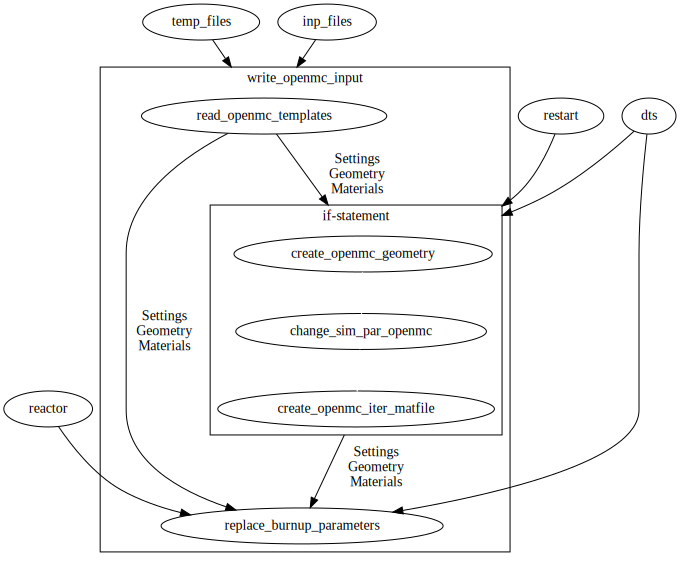

In [81]:
og

In [4]:
# Depcode Class diagram
depcode = gv.Digraph('cluster_depcode')
depcode.attr(compound='true',label='Depcode')

depcode.subgraph(graph=wdi)

depcode.node('get_nuc_name')
depcode.node('get_tra_or_dec')
depcode.node('read_dep_comp')
depcode.node('read_depcode_info')
depcode.node('read_depcode_step_param')
depcode.node('run_depcode')
depcode.node('sss_meta_zzz')
depcode.node('write_mat_file')
depcode.node('write_depcode_input')

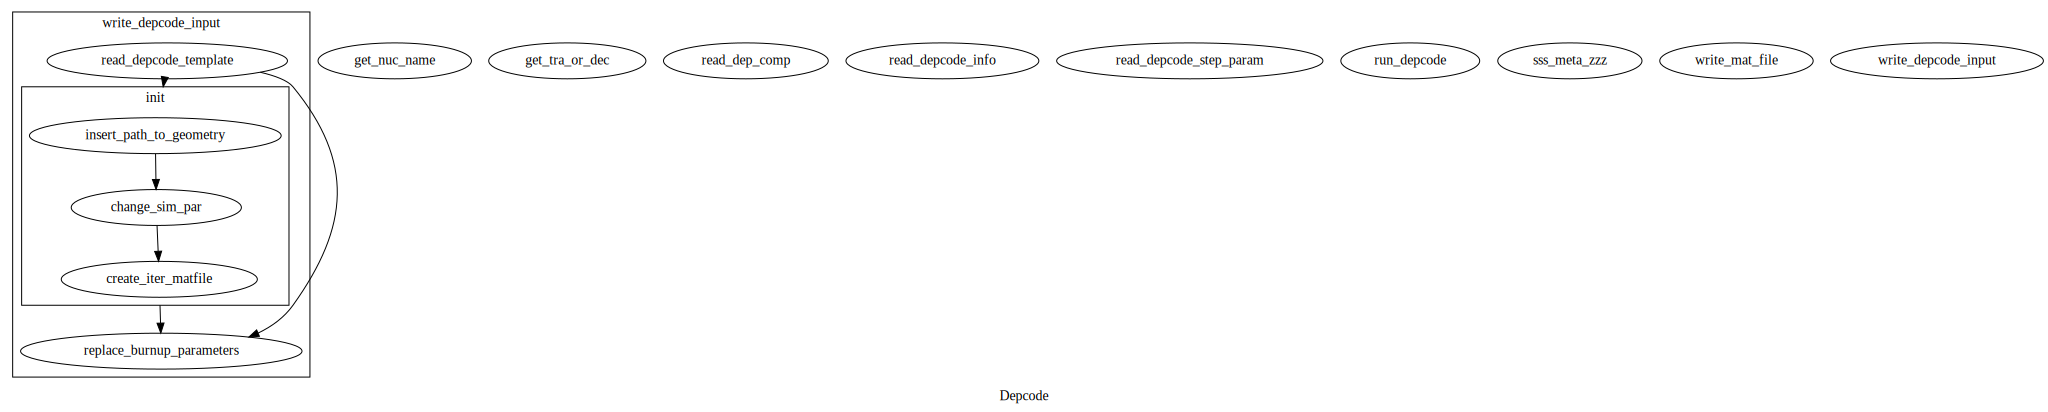

In [5]:
depcode

In [6]:
rnr_init = gv.Digraph('cluster_rnr_init')
rnr_init.attr(compound='true', label='init')
rnr_init.node('write_depcode_input')
rnr_init.node('store_run_init_info')

In [7]:
rnr = gv.Digraph('cluster_rnr')
rnr.attr(compound='true', label='runsim_no_reproc')
rnr.subgraph(graph=rnr_init)
rnr.edge('write_depcode_input','run_depcode')#rnr.edge('replace_burnup_parameters', 'run_depcode', ltail='cluster_wdi')
rnr.edge('run_depcode','store_run_init_info')
rnr.edge('run_depcode','read_dep_comp')
rnr.edge('read_dep_comp','store_mat_data')
rnr.edge('store_mat_data','store_run_step_info')
rnr.edge('store_run_step_info','write_mat_file')

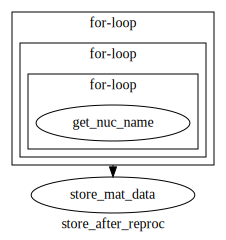

In [8]:
sar_loop = gv.Digraph('cluster_sar_loop')
sar_loop.attr(compound='true',label='for-loop')
with sar_loop.subgraph(name='cluster_loop0') as l0:
    l0.attr(compound='true',label='for-loop')
    with l0.subgraph(name='cluster_loop1') as l1:
        l1.attr(compound='true',label='for-loop')
        l1.node('get_nuc_name')

sar = gv.Digraph('cluster_sar')
sar.attr(compound='true', label='store_after_reproc')
sar.subgraph(graph=sar_loop)
sar.edge('get_nuc_name','store_mat_data',ltail='cluster_sar_loop')
sar

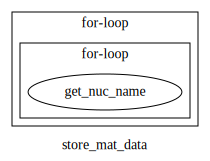

In [9]:
smd_loop = gv.Digraph('cluster_smd_loop')
smd_loop.attr(compound='true',label='for-loop')
with smd_loop.subgraph(name='cluster_loop0') as l0:
    l0.attr(compound='true',label='for-loop')
    l0.node('get_nuc_name')
        
smd = gv.Digraph('cluster_smd')
smd.attr(compound='true',label='store_mat_data')
smd.subgraph(graph=smd_loop)
smd

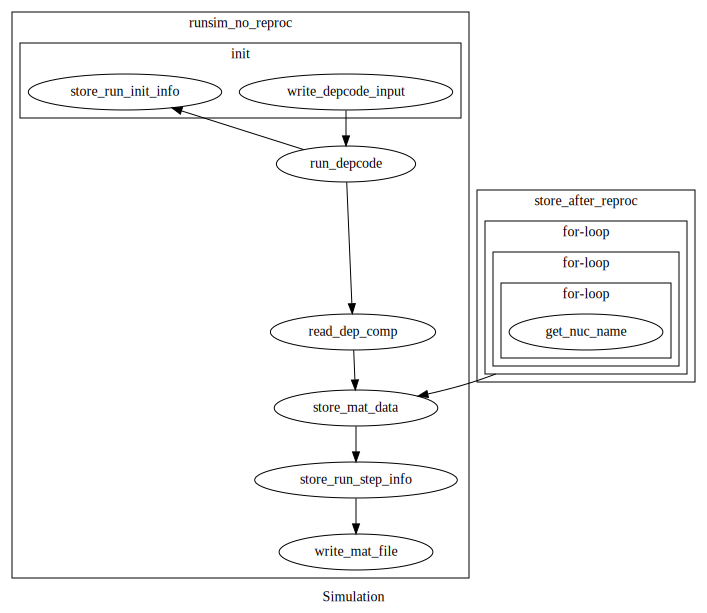

In [10]:
simulation = gv.Digraph('cluster_simulation')
simulation.attr(compound='true',label='Simulation')
simulation.subgraph(graph=rnr)
simulation.subgraph(graph=sar)
simulation.subgraph(graph=smd)
simulation

In [11]:
saltproc = gv.Digraph('saltproc')
saltproc.attr(compound='true', label='SaltProc')
saltproc.subgraph(graph=depcode)
saltproc.subgraph(graph=simulation)

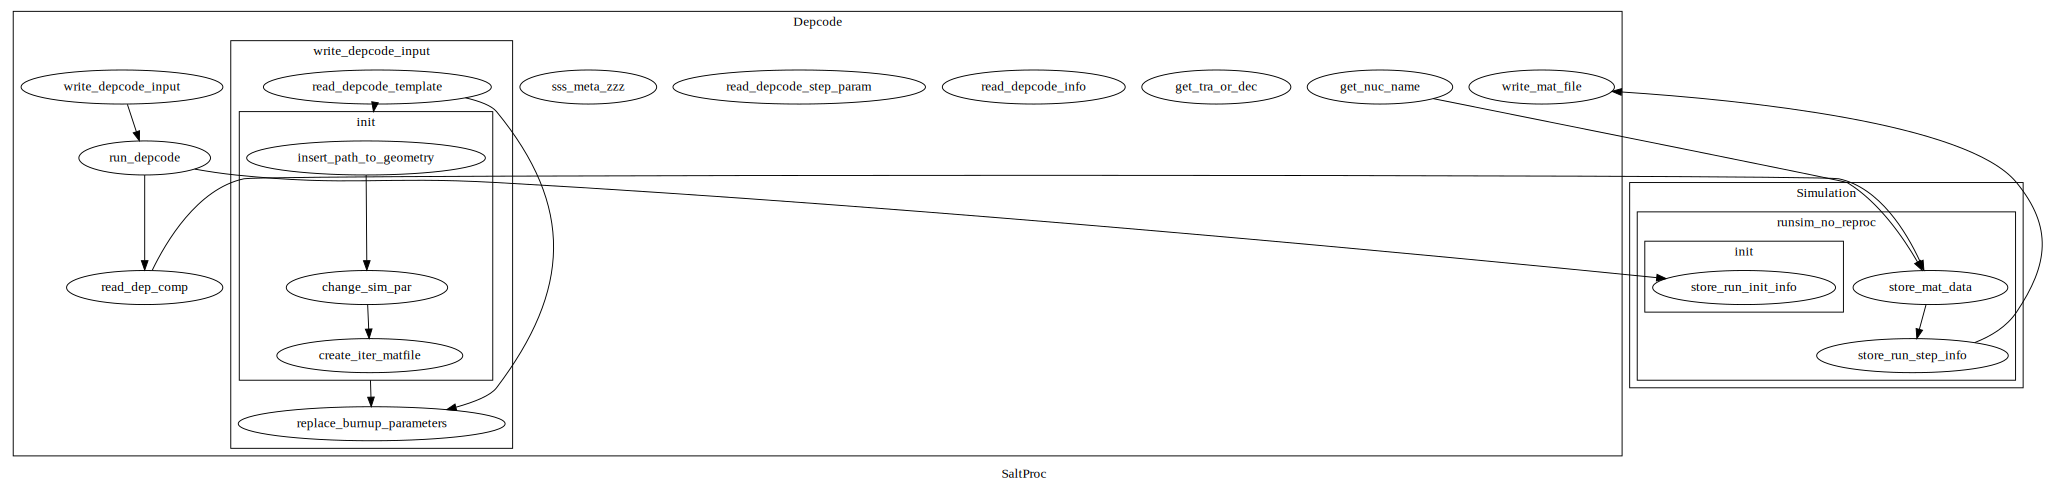

In [12]:
saltproc